# Loading libraries

In [1]:
import gzip
import json
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading datasets

## Reviews dataset

In [ ]:
# Specify the path to your Parquet file
reviews_parquet_file = '/Users/ShanShan/BT4301/MySQL/test/cleaned/results/customer_clean.xlsx'

# Read the Parquet file into a pandas DataFrame
reviews_df = pd.read_excel(reviews_parquet_file)

In [3]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rating             50000 non-null  int64 
 1   title              49997 non-null  object
 2   text               49999 non-null  object
 3   asin               50000 non-null  object
 4   parent_asin        50000 non-null  object
 5   user_id            50000 non-null  object
 6   timestamp          50000 non-null  int64 
 7   helpful_vote       50000 non-null  int64 
 8   verified_purchase  50000 non-null  bool  
 9   count_user_id      50000 non-null  int64 
 10  count_parent_asin  50000 non-null  int64 
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


In [4]:
reviews_df.shape

(50000, 11)

In [5]:
reviews_df.columns

Index(['rating', 'title', 'text', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'count_user_id',
       'count_parent_asin'],
      dtype='object')

In [6]:
# Display the first few rows
reviews_df.head()

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,count_user_id,count_parent_asin
0,5,excellent writer reminds me of Clive Cussler,GRUMLEY is on par with Clive Cussler and his D...,B00LXRJICK,B00LXRJICK,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1427541413000,0,False,1,7
1,3,Alright book,The book Fade was not my favorite but was a go...,B073DFP8VC,B073DFP8VC,AHGTHCERTEZUXNBLJ5SWHK2CDLXA,1504226946142,0,True,1,1
2,5,Hats off to Fern Michaels for all her great ac...,I have been a fan of this author for many year...,B07QVH25KX,B07QVH25KX,AHFY2QSS6PK5MHSYZFI6TXUYNPLQ,1644883955777,0,True,2,2
3,5,Great read,This book is more than just about a dog and a ...,B004Y1NWQU,B004Y1NWQU,AHFY2QSS6PK5MHSYZFI6TXUYNPLQ,1363027885000,0,False,2,2
4,5,Add to legend f Arthur,Good twist on the ledgen of King<br />Arthur !...,B08M993CNC,B08M993CNC,AFWHJ6O3PV4JC7PVOJH6CPULO2KQ,1637557512064,0,True,35,1


## Meta dataset

In [ ]:
# Specify the path to your Parquet file
meta_parquet_file = '/Users/ShanShan/BT4301/MySQL/test/cleaned/results/product_clean.xlsx'

# Read the Parquet file into a pandas DataFrame
meta_df = pd.read_excel(meta_parquet_file)

In [8]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             50000 non-null  object 
 1   subtitle          49084 non-null  object 
 2   author            41920 non-null  object 
 3   average_rating    50000 non-null  float64
 4   rating_number     50000 non-null  int64  
 5   price             47257 non-null  float64
 6   categories        50000 non-null  object 
 7   publication_date  49916 non-null  float64
 8   parent_asin       50000 non-null  object 
 9   language          49919 non-null  object 
 10  print_length      49218 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 4.2+ MB


In [9]:
meta_df.shape

(50000, 11)

In [10]:
meta_df.columns

Index(['title', 'subtitle', 'author', 'average_rating', 'rating_number',
       'price', 'categories', 'publication_date', 'parent_asin', 'language',
       'print_length'],
      dtype='object')

In [11]:
# Display the first few rows
meta_df.head()

,title,subtitle,author,average_rating,rating_number,price,categories,publication_date,parent_asin,language,print_length
0,The Palace (Chateau Book 4),Kindle Edition,Penelope Sky,4.7,970,0.00,['Kindle Store' 'Kindle eBooks' 'Romance'],18771.666667,B08XPZPFY4,English,378.0
1,Microsoft PowerPoint 2016 2013 2010 2007 Tips ...,[Print Replica] Kindle Edition,Amelia Griggs,4.3,35,0.00,['Kindle Store' 'Kindle eBooks' 'Computers & T...,17683.666667,B07DH1LF1K,English,NaN
2,Ill Wind (Anna Pigeon Mysteries Book 3),Kindle Edition,Nevada Barr,4.4,1628,7.99,"['Kindle Store' 'Kindle eBooks' 'Mystery, Thri...",14331.666667,B0022Q8CTQ,English,324.0
3,30 Healthy Easy Quick Lentil Recipes (Brad Arm...,Kindle Edition,Brad Armstrong,3.8,47,0.00,"['Kindle Store' 'Kindle eBooks' 'Health, Fitne...",15773.666667,B00BS56MLC,English,74.0
4,The Road Home,Kindle Edition,Jim Harrison,4.5,475,10.44,['Kindle Store' 'Kindle eBooks' 'Literature & ...,13847.666667,B00155EZRS,English,466.0


# Check for missing values

## Reviews dataset

In [12]:
# Check for missing values
reviews_df.isnull().sum()

rating               0
title                3
text                 1
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
count_user_id        0
count_parent_asin    0
dtype: int64

## Meta dataset

In [13]:
# Check for missing values
meta_df.isnull().sum()

title                  0
subtitle             916
author              8080
average_rating         0
rating_number          0
price               2743
categories             0
publication_date      84
parent_asin            0
language              81
print_length         782
dtype: int64

# Check for duplicated values

## Reviews dataset

In [14]:
# reviews_df_duplicates = reviews_df.duplicated().sum()

# print("Number of duplicates in dataset:", reviews_df_duplicates)

In [15]:
# # Identify duplicate rows (considering all columns)
# reviews_duplicate_rows = reviews_df[reviews_df.duplicated(keep=False)]

# print("Duplicate rows in the dataset:\n", reviews_duplicate_rows)

In [16]:
# # Filter for rows where 'verified_purchase' is FALSE
# reviews_duplicate_rows_unverified = reviews_duplicate_rows[reviews_duplicate_rows["verified_purchase"] == False]

# # Print the filtered duplicate rows
# print("Duplicate rows where 'verified_purchase' is FALSE:\n", reviews_duplicate_rows_unverified)

Drop the duplicate rows

In [17]:
# # Drop these rows from the original dataframe
# reviews_df_noduplicates_verified = reviews_df.drop(reviews_duplicate_rows_unverified.index)

# # Reset index for cleanliness (optional)
# reviews_df_noduplicates_verified = reviews_df_noduplicates_verified.reset_index(drop=True)

# # Check the new count of duplicates to confirm removal
# print("Number of duplicates after dropping: ", reviews_df_noduplicates_verified.duplicated().sum())

In [18]:
# # Drop duplicates while keeping the first occurrence
# reviews_df = reviews_df.drop_duplicates()

# # Check the new count of duplicates to confirm removal
# print("Number of duplicates after dropping: ", reviews_df.duplicated().sum())

## Meta dataset

In [19]:
# Identify columns that contain unhashable types (lists)
for col in meta_df.columns:
    if meta_df[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains lists")

In [20]:
# Convert list-like columns to tuples (hashable type)
meta_df_separate = meta_df.apply(lambda col: col.map(lambda x: tuple(x) if isinstance(x, list) else x))

In [21]:
meta_df_duplicates = meta_df_separate.duplicated().sum()
print("Number of duplicates in dataset: ", meta_df_duplicates)

Number of duplicates in dataset:  0


# Describing dataset

## Reviews dataset

In [22]:
reviews_df.describe()

,rating,timestamp,helpful_vote,count_user_id,count_parent_asin
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,4.339560,1.523031e+12,1.227400,394.465600,1.595280
std,0.966953,9.066284e+10,8.343999,483.495218,1.833136
min,1.000000,1.151076e+12,0.000000,1.000000,1.000000
25%,4.000000,1.454606e+12,0.000000,24.000000,1.000000
50%,5.000000,1.529043e+12,0.000000,175.000000,1.000000
75%,5.000000,1.597065e+12,1.000000,644.000000,1.000000
max,5.000000,1.679175e+12,888.000000,1669.000000,27.000000


## Meta dataset

In [23]:
meta_df.describe()

,average_rating,rating_number,price,publication_date,print_length
count,50000.000000,50000.000000,47257.000000,49916.000000,49218.000000
mean,4.307856,424.006680,3.857522,16956.528875,251.437990
std,0.513857,2518.897923,8.333157,1669.078644,575.317223
min,1.000000,1.000000,0.000000,-31674.000000,0.000000
25%,4.100000,12.000000,0.000000,15994.666667,112.000000
50%,4.400000,45.000000,0.990000,17007.166667,221.000000
75%,4.600000,198.000000,4.990000,18214.666667,320.000000
max,5.000000,138549.000000,982.990000,19498.666667,91266.000000


# Distribution of columns in Reviews dataset

## rating

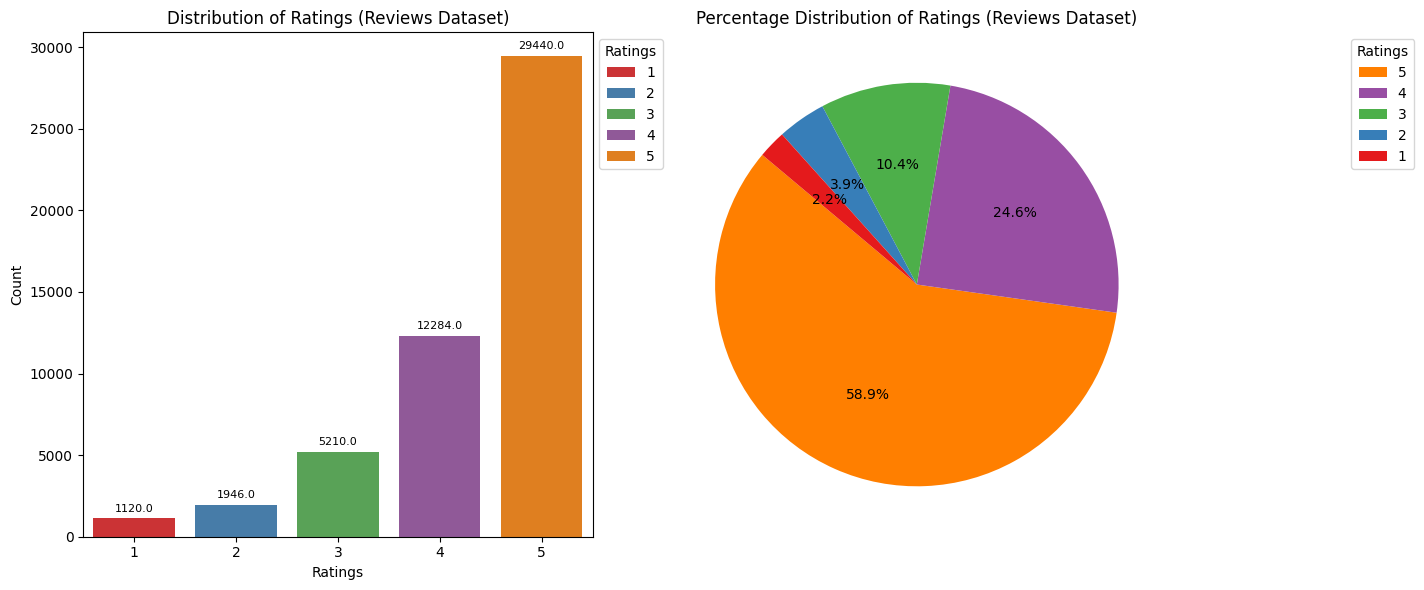

In [24]:
# Set up the plot for Reviews countplot
plt.figure(figsize=(14, 6))

# Get unique ratings dynamically from reviews_df
unique_ratings_reviews_df = sorted(reviews_df['rating'].dropna().unique())  
set1_colors_reviews_df = sns.color_palette("Set1", n_colors=len(unique_ratings_reviews_df))

# Create a mapping of ratings to colors
rating_colors_reviews_df = {rating: color for rating, color in zip(unique_ratings_reviews_df, set1_colors_reviews_df)}

# Plot the countplot with hue set to 'rating'
ax_reviews_df = plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=reviews_df, hue='rating', palette=rating_colors_reviews_df)

# Add title and labels
plt.title("Distribution of Ratings (Reviews Dataset)")
plt.xlabel("Ratings")  
plt.ylabel("Count")    

# Add number on top of each bar
for p in ax_reviews_df.patches:
    height = p.get_height()
    if height > 0:
        ax_reviews_df.annotate(f'{height}', 
                            (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='baseline',
                            fontsize=8, color='black', xytext=(0, 5), 
                            textcoords='offset points')

# Show legend outside the plot
plt.legend(title='Ratings', loc='upper left', bbox_to_anchor=(1, 1))

# Create a pie chart for the percentage distribution of ratings
plt.subplot(1, 2, 2)
rating_counts_reviews_df = reviews_df['rating'].value_counts()
wedges_reviews_df, texts_reviews_df, autotexts_reviews_df = plt.pie(
    rating_counts_reviews_df, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=[rating_colors_reviews_df[rating] for rating in rating_counts_reviews_df.index]
)

# Add title for the pie chart
plt.title("Percentage Distribution of Ratings (Reviews Dataset)")

# Create a legend
plt.legend(wedges_reviews_df, rating_counts_reviews_df.index, title="Ratings", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout and show the plot
plt.tight_layout()  
plt.show()

## verified_purchase

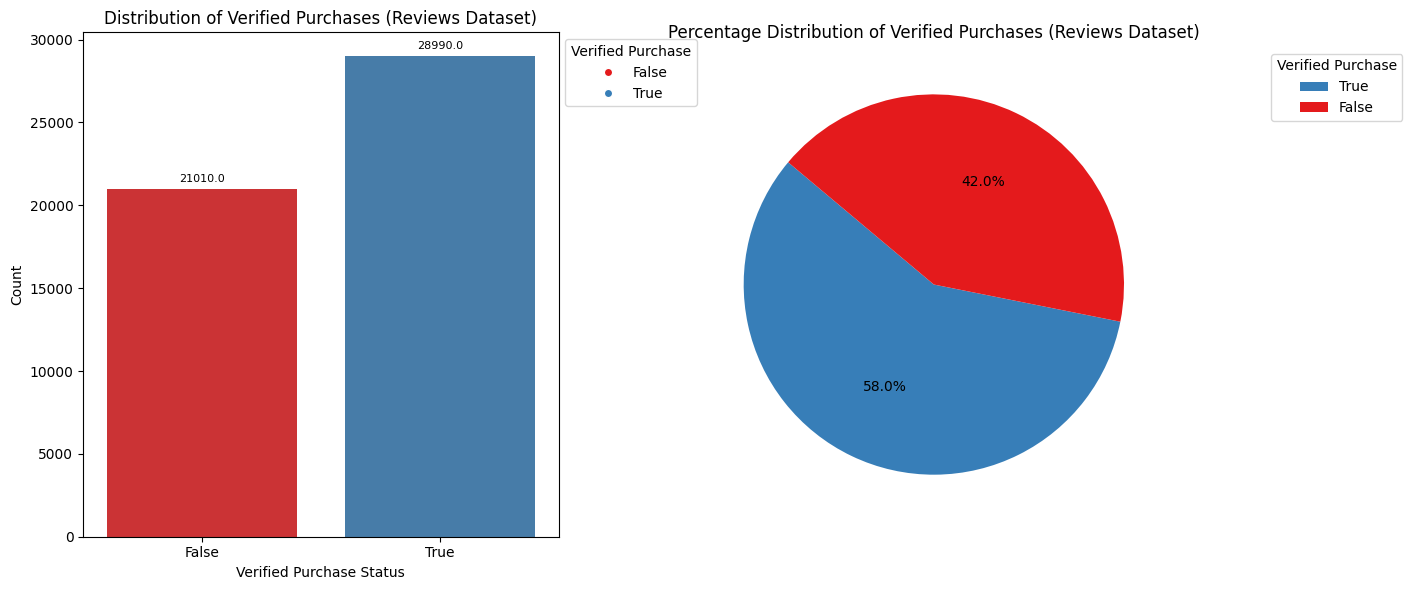

In [25]:
# Choose a color palette for verified purchase dataset
unique_verified_purchase_reviews = reviews_df['verified_purchase'].unique()
colors_verified_purchase_reviews = sns.color_palette("Set1", n_colors=len(unique_verified_purchase_reviews))

# Create a dictionary to map each verified purchase category to its corresponding color
verified_purchase_color_map_reviews = dict(zip(unique_verified_purchase_reviews, colors_verified_purchase_reviews))

# Set up the plot for Verified Purchase countplot and pie chart
plt.figure(figsize=(14, 6))

# Plot the countplot with hue for verified purchases in reviews_df
ax_verified_purchase_reviews = plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.countplot(x='verified_purchase', data=reviews_df, hue='verified_purchase', palette=verified_purchase_color_map_reviews)

# Add title
plt.title("Distribution of Verified Purchases (Reviews Dataset)")

# Add axis labels
plt.xlabel("Verified Purchase Status")  
plt.ylabel("Count")                

# Add number on top of each bar
for p in ax_verified_purchase_reviews.patches:
    height = p.get_height()
    if height > 0:
        ax_verified_purchase_reviews.annotate(f'{height}', 
                                              (p.get_x() + p.get_width() / 2., height), 
                                              ha='center', va='baseline',
                                              fontsize=8, color='black', xytext=(0, 5), 
                                              textcoords='offset points')

# Manually create legend for the countplot
handles_verified_purchase_reviews = [plt.Line2D([0], [0], marker='o', color='w', label=str(status), 
                                                 markerfacecolor=verified_purchase_color_map_reviews[status]) 
                                     for status in unique_verified_purchase_reviews]
plt.legend(handles=handles_verified_purchase_reviews, title='Verified Purchase', loc='upper left', bbox_to_anchor=(1, 1))

# Create a pie chart for the percentage distribution of verified purchases
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
verified_purchase_counts_reviews = reviews_df['verified_purchase'].value_counts()
wedges_verified_purchase_reviews, texts_verified_purchase_reviews, autotexts_verified_purchase_reviews = plt.pie(
    verified_purchase_counts_reviews, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=[verified_purchase_color_map_reviews[status] for status in verified_purchase_counts_reviews.index]
)

# Add title for the pie chart
plt.title("Percentage Distribution of Verified Purchases (Reviews Dataset)")

# Create a legend with the corresponding colors for the pie chart
plt.legend(wedges_verified_purchase_reviews, verified_purchase_counts_reviews.index, title="Verified Purchase", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout and show the plot
plt.tight_layout()  
plt.show()

## helpful_vote

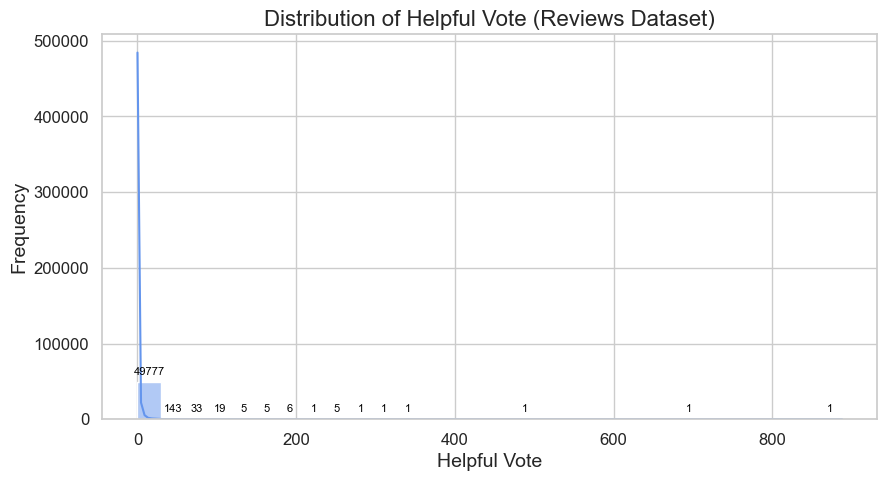

In [26]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 5))

# Plot histogram for helpful_vote in reviews_df
hist_plot_helpful_vote = sns.histplot(reviews_df['helpful_vote'], bins=30, kde=True, color='cornflowerblue')

# Set title and labels
plt.title("Distribution of Helpful Vote (Reviews Dataset)", fontsize=16)
plt.xlabel("Helpful Vote", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add counts on top of each bar
for p in hist_plot_helpful_vote.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars that are non-zero
        hist_plot_helpful_vote.annotate(f'{int(height)}', 
                                        (p.get_x() + p.get_width() / 2., height), 
                                        ha='center', va='baseline', fontsize=8, color='black', 
                                        xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


Number of outliers in helpful_vote: 4726
Number of rows after removing outliers: 45274


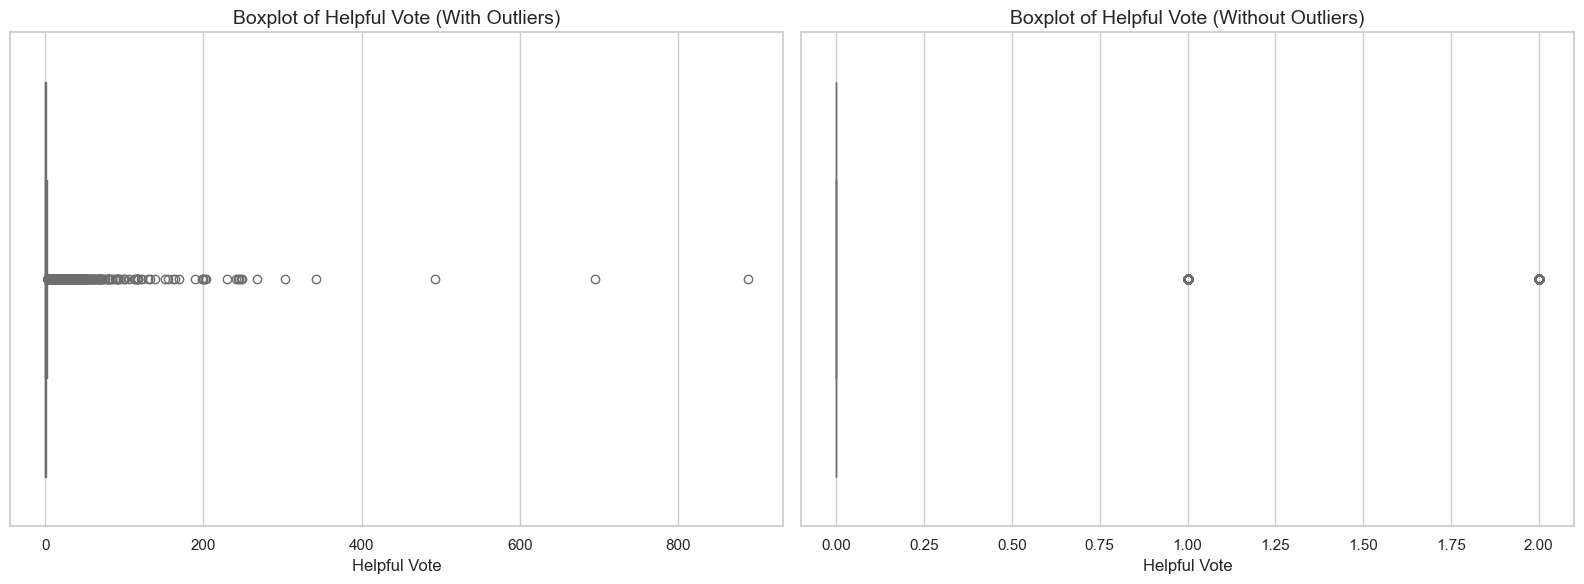

In [27]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# Define a unique variable name for the column
helpful_vote_column = reviews_df['helpful_vote']

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_helpful_vote = helpful_vote_column.quantile(0.25)
Q3_helpful_vote = helpful_vote_column.quantile(0.75)

# Compute Interquartile Range (IQR)
IQR_helpful_vote = Q3_helpful_vote - Q1_helpful_vote

# Define lower and upper bounds for outliers
lower_bound_helpful_vote = Q1_helpful_vote - 1.5 * IQR_helpful_vote
upper_bound_helpful_vote = Q3_helpful_vote + 1.5 * IQR_helpful_vote

# Identify outliers
outliers_helpful_vote = reviews_df[
    (helpful_vote_column < lower_bound_helpful_vote) | 
    (helpful_vote_column > upper_bound_helpful_vote)
]

# Display the outliers
print(f"Number of outliers in helpful_vote: {len(outliers_helpful_vote)}")

# Remove outliers based on IQR method
reviews_df_helpful_vote_no_outliers = reviews_df[
    (helpful_vote_column >= lower_bound_helpful_vote) & 
    (helpful_vote_column <= upper_bound_helpful_vote)
]

# Confirm removal
print(f"Number of rows after removing outliers: {len(reviews_df_helpful_vote_no_outliers)}")

# Create subplots for boxplots with and without outliers
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot with outliers
sns.boxplot(x=helpful_vote_column, color='lightcoral', ax=axes[0])
axes[0].set_title("Boxplot of Helpful Vote (With Outliers)", fontsize=14)
axes[0].set_xlabel("Helpful Vote", fontsize=12)

# Boxplot without outliers
sns.boxplot(x=reviews_df_helpful_vote_no_outliers['helpful_vote'], color='lightcoral', ax=axes[1])
axes[1].set_title("Boxplot of Helpful Vote (Without Outliers)", fontsize=14)
axes[1].set_xlabel("Helpful Vote", fontsize=12)

# Display the plots side by side
plt.tight_layout()
plt.show()

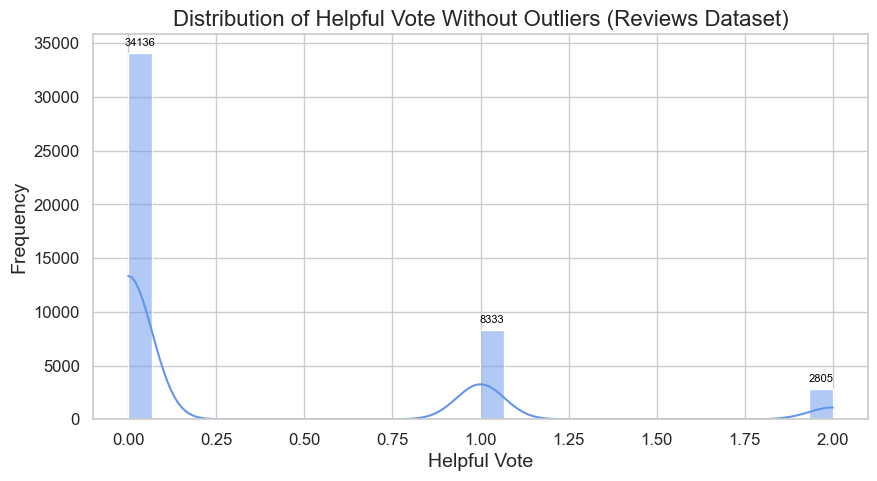

In [28]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 5))

# Plot histogram for helpful_vote without outliers
hist_plot_helpful_vote_no_outliers = sns.histplot(reviews_df_helpful_vote_no_outliers['helpful_vote'], bins=30, kde=True, color='cornflowerblue')

# Set title and labels
plt.title("Distribution of Helpful Vote Without Outliers (Reviews Dataset)", fontsize=16)
plt.xlabel("Helpful Vote", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add counts on top of each bar
for p in hist_plot_helpful_vote_no_outliers.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars that are non-zero
        hist_plot_helpful_vote_no_outliers.annotate(f'{int(height)}', 
                                                   (p.get_x() + p.get_width() / 2., height), 
                                                   ha='center', va='baseline', fontsize=8, color='black', 
                                                   xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

## timestamp

In [29]:
# Convert timestamp from milliseconds to datetime
reviews_df['date'] = pd.to_datetime(reviews_df['timestamp'], unit='ms')

# Extract Year, Month, and Day into new columns
reviews_df['year'] = reviews_df['date'].dt.year
reviews_df['month'] = reviews_df['date'].dt.month
reviews_df['day'] = reviews_df['date'].dt.day


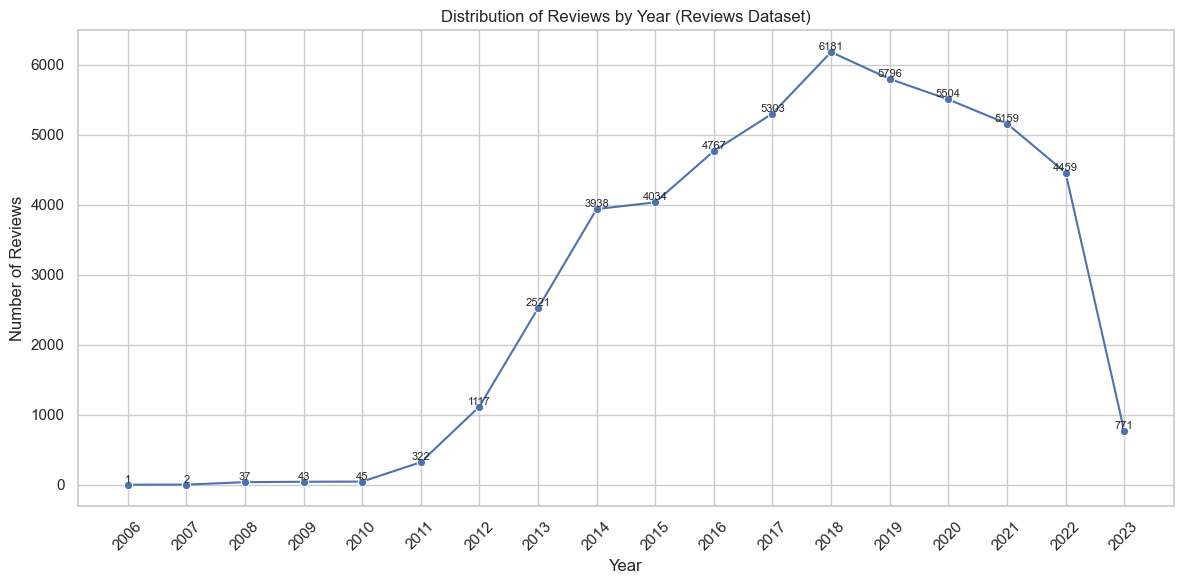

In [30]:
# Count the number of reviews per year
reviews_per_year = reviews_df['year'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=reviews_per_year.index, y=reviews_per_year.values, marker='o')

# Add title and labels
plt.title("Distribution of Reviews by Year (Reviews Dataset)")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")

# Annotate each point with the review count
for x, y in zip(reviews_per_year.index, reviews_per_year.values):
    plt.text(x, y, str(y), fontsize=8, ha='center', va='bottom')

# Format x-axis to display all years clearly
plt.xticks(reviews_per_year.index, rotation=45)

# Show plot
plt.tight_layout()
plt.show()

# Distribution of columns in Meta dataset

## average_rating

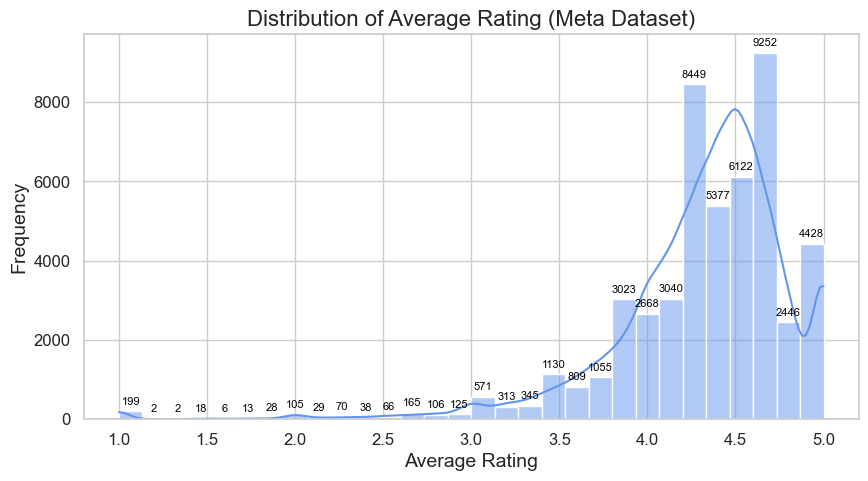

In [31]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 5))

# Plot histogram for average_rating in meta_df
hist_plot_avg_rating = sns.histplot(meta_df['average_rating'], bins=30, kde=True, color='cornflowerblue')

# Set title and labels
plt.title("Distribution of Average Rating (Meta Dataset)", fontsize=16)
plt.xlabel("Average Rating", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add counts on top of each bar
for p in hist_plot_avg_rating.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars that are non-zero
        hist_plot_avg_rating.annotate(f'{int(height)}', 
                                      (p.get_x() + p.get_width() / 2., height), 
                                      ha='center', va='baseline', fontsize=8, color='black', 
                                      xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

## rating_number

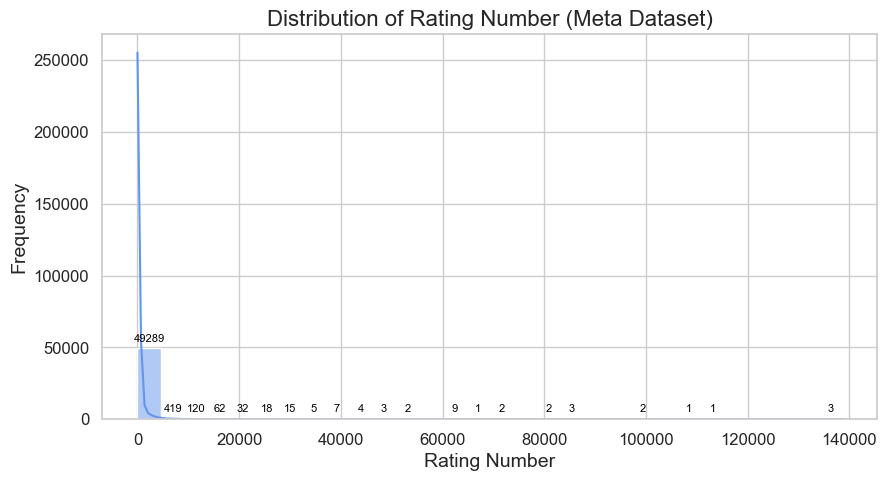

In [32]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 5))

# Plot histogram for rating_number in meta_df
hist_plot_rating_number = sns.histplot(meta_df['rating_number'], bins=30, kde=True, color='cornflowerblue')

# Set title and labels
plt.title("Distribution of Rating Number (Meta Dataset)", fontsize=16)
plt.xlabel("Rating Number", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add counts on top of each bar
for p in hist_plot_rating_number.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars that are non-zero
        hist_plot_rating_number.annotate(f'{int(height)}', 
                                         (p.get_x() + p.get_width() / 2., height), 
                                         ha='center', va='baseline', fontsize=8, color='black', 
                                         xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


## price

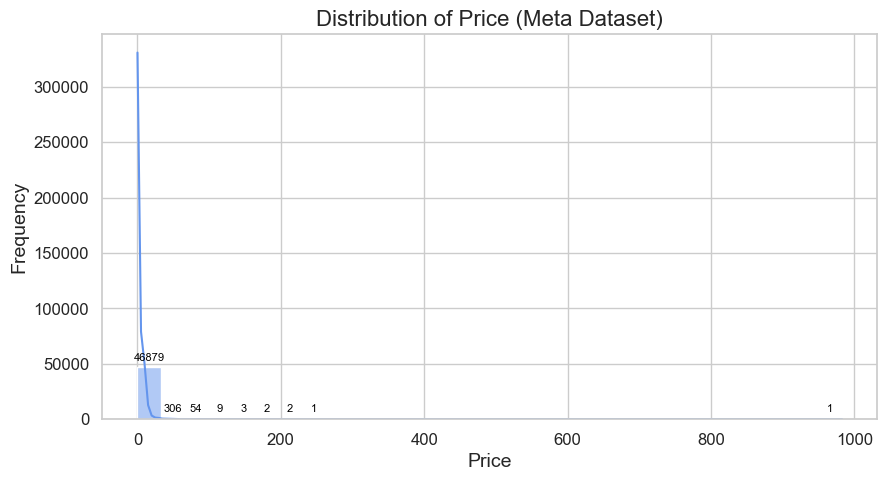

In [33]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 5))

# Plot histogram for price in meta_df
hist_plot_price = sns.histplot(meta_df['price'], bins=30, kde=True, color='cornflowerblue')

# Set title and labels
plt.title("Distribution of Price (Meta Dataset)", fontsize=16)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add counts on top of each bar
for p in hist_plot_price.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars that are non-zero
        hist_plot_price.annotate(f'{int(height)}', 
                                 (p.get_x() + p.get_width() / 2., height), 
                                 ha='center', va='baseline', fontsize=8, color='black', 
                                 xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

## print_length

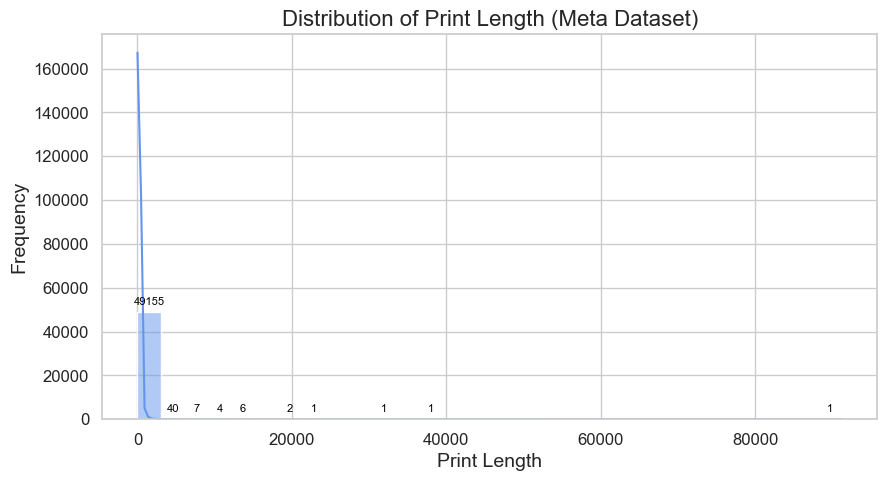

In [34]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 5))

# Plot histogram for print_length in meta_df
hist_plot_print_length = sns.histplot(meta_df['print_length'], bins=30, kde=True, color='cornflowerblue')

# Set title and labels
plt.title("Distribution of Print Length (Meta Dataset)", fontsize=16)
plt.xlabel("Print Length", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add counts on top of each bar
for p in hist_plot_print_length.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars that are non-zero
        hist_plot_print_length.annotate(f'{int(height)}', 
                                        (p.get_x() + p.get_width() / 2., height), 
                                        ha='center', va='baseline', fontsize=8, color='black', 
                                        xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


# MAB

In [35]:
class ReplaySimulator(object):
    def __init__(self, n_visits, reward_history, item_col_name, visitor_col_name, reward_col_name, n_iterations=1, random_seed=1):
        # Set the random seed for reproducibility
        np.random.seed(random_seed)

        # Store input data and parameters
        self.reward_history = reward_history
        self.item_col_name = item_col_name
        self.visitor_col_name = visitor_col_name
        self.reward_col_name = reward_col_name

        # Number of visits to replay/simulate
        self.n_visits = n_visits

        # Number of runs to average over
        self.n_iterations = n_iterations

        # Items under test
        self.items = self.reward_history[self.item_col_name].unique()
        self.n_items = len(self.items)

        # Visitors in the historical reward_history
        self.visitors = self.reward_history[self.visitor_col_name].unique()
        self.n_visitors = len(self.visitors)

    def reset(self):
        # Initialize counters for item samples and rewards
        self.n_item_samples = np.zeros(self.n_items)
        self.n_item_rewards = np.zeros(self.n_items)

    def replay(self):
        # Store simulation results
        results = []

        for iteration in tqdm(range(0, self.n_iterations)):
            # Reset counters for each iteration
            self.reset()

            total_rewards = 0
            fraction_relevant = np.zeros(self.n_visits)

            for visit in range(0, self.n_visits):
                found_match = False
                while not found_match:
                    # Choose a random visitor
                    visitor_idx = np.random.randint(self.n_visitors)
                    visitor_id = self.visitors[visitor_idx]

                    # Select an item to offer the visitor
                    item_idx = self.select_item()
                    item_id = self.items[item_idx]

                    # Check if this interaction exists in the history
                    reward = self.reward_history.query(
                        '{} == @item_id and {} == @visitor_id'.format(self.item_col_name, self.visitor_col_name))[self.reward_col_name]

                    found_match = reward.shape[0] > 0

                reward_value = reward.iloc[0]

                self.record_result(visit, item_idx, reward_value)

                # Record metrics
                total_rewards += reward_value
                fraction_relevant[visit] = total_rewards * 1. / (visit + 1)

                result = {}
                result['iteration'] = iteration
                result['visit'] = visit
                result['item_id'] = item_id
                result['visitor_id'] = visitor_id
                result['reward'] = reward_value
                result['total_reward'] = total_rewards
                result['fraction_relevant'] = total_rewards * 1. / (visit + 1)

                results.append(result)

        return results

    def select_item(self):
        # This method selects an item randomly
        return np.random.randint(self.n_items)

    def record_result(self, visit, item_idx, reward):
        # This method records the result of an interaction and updates item statistics

        # Update the number of times the item has been sampled
        self.n_item_samples[item_idx] += 1

        # Update the fraction of time the item has resulted in a reward
        alpha = 1. / self.n_item_samples[item_idx]
        self.n_item_rewards[item_idx] += alpha * (reward - self.n_item_rewards[item_idx])


In [36]:
class EpsilonGreedyReplayer(ReplaySimulator):
    '''
    A class to provide functionality for simulating the replayer method on an epsilon-Greedy bandit algorithm.
    '''

    def __init__(self, epsilon, n_visits, reward_history, item_col_name, visitor_col_name, reward_col_name, n_iterations=1):
        super(EpsilonGreedyReplayer, self).__init__(n_visits, reward_history, item_col_name, visitor_col_name, reward_col_name, n_iterations)
    
        # parameter to control exploration vs exploitation
        self.epsilon = epsilon
    
    def select_item(self):
        
        # decide to explore or exploit
        if np.random.uniform() < self.epsilon: # explore
            item_id = super(EpsilonGreedyReplayer, self).select_item()
            
        else: # exploit
            item_id = np.argmax(self.n_item_rewards)
            
        return item_id

In [37]:
# Initiate the list of best 5 recommendations
best_5_recommendations_fy = []

In [38]:
merged_df = reviews_df.merge(meta_df, on='parent_asin', how='inner')

In [39]:
# Retrieve the required columns and create a new dataframe
mab_df = merged_df[['user_id', 'parent_asin', 'rating', 'title_y']].copy()

In [40]:
# Create a new column called 'like' where rating >= 4 is considered a like
mab_df['like'] = mab_df['rating'] >= 4

# Map user_id and parent_asin to unique integer indices
user_id_mapping = {user: idx for idx, user in enumerate(mab_df['user_id'].unique())}
parent_asin_mapping = {parent_asin: idx for idx, parent_asin in enumerate(mab_df['parent_asin'].unique())}

# Map the original user_id and parent_asin columns in mab_df to their corresponding integer values
mab_df['user_id_int'] = mab_df['user_id'].map(user_id_mapping)
mab_df['parent_asin_int'] = mab_df['parent_asin'].map(parent_asin_mapping)

In [41]:
# Updated reward history with integer mappings
reward_history = mab_df[['user_id_int', 'parent_asin_int', 'like']]

# Columns for the simulator
item_col_name = 'parent_asin_int'
visitor_col_name = 'user_id_int'
reward_col_name = 'like'

# Parameters for the simulation
n_visits = 20000
n_iterations = 20
n_test_visits = 1000

In [42]:
epsilon = 0.05
epsilon_05_results_fy = EpsilonGreedyReplayer(epsilon, n_visits, reward_history,
                                            item_col_name, visitor_col_name, reward_col_name,
                                            n_iterations=n_iterations).replay()
epsilon_05_results_fy_df = pd.DataFrame(epsilon_05_results_fy)

100%|██████████| 20/20 [36:57:18<00:00, 6651.94s/it]   


In [ ]:
epsilon_05_results_fy_df.to_csv('/Users/ShanShan/BT4301/MySQL/test/cleaned/results/epsilon_05_results_20000.csv')

In [ ]:
epsilon_05_results_fy_df = pd.read_csv('/Users/ShanShan/BT4301/MySQL/test/cleaned/results/epsilon_05_results_20000.csv')

In [95]:
# Create a dataframe with running totals of how many times each recommendation was taken
epsilon_05_fy_running_ttl = epsilon_05_results_fy_df.query('iteration == 0') \
                                .assign(selected=1) \
                                .pivot(index='visit', columns='item_id', values='selected') \
                                .fillna(0) \
                                .cumsum(axis=0) \
                                .reset_index()

# Scale the value by the visit number to get turn the running total into a percentage
epsilon_05_fy_running_ttl.iloc[:,1:] = epsilon_05_fy_running_ttl.iloc[:,1:].div((epsilon_05_fy_running_ttl.visit + 1)/100, axis=0)

In [96]:
# View the results in the final iteration in descending order
final_recommendations_05_fy = epsilon_05_fy_running_ttl.iloc[-1, 1:].nlargest()
final_recommendations_05_fy

item_id
0      95.1
27      0.3
713     0.2
15      0.1
28      0.1
Name: 999, dtype: float64

In [97]:
# Aggregate results for each user and item to find the total rewards
aggregated_results = epsilon_05_results_fy_df.groupby(['visitor_id', 'item_id'])['reward'].sum().reset_index()

# Sort the results by total reward per user and item
aggregated_results['rank'] = aggregated_results.groupby('visitor_id')['reward'].rank(ascending=False, method='first')

# Recommend the top 5 items for each user based on their total reward
# top_5_recommendations = aggregated_results[aggregated_results['rank'] <= 5]

In [98]:
# Reverse the mappings to map back from integers to the original values
user_id_mapping_reverse = {v: k for k, v in user_id_mapping.items()}

parent_asin_mapping_reverse = {v: k for k, v in parent_asin_mapping.items()}

# Map visitor_id back to user_id
aggregated_results['user_id'] = aggregated_results['visitor_id'].map(user_id_mapping_reverse)

# Map item_id back to parent_asin
aggregated_results['parent_asin'] = aggregated_results['item_id'].map(parent_asin_mapping_reverse)


In [99]:
# Merge the aggregated_results with mab_df to get title_y based on parent_asin_int
aggregated_results = aggregated_results.merge(mab_df[['parent_asin', 'title_y']], on='parent_asin', how='inner')

In [100]:
aggregated_results.shape

(1368, 7)

In [101]:
# Drop duplicates based on the 'parent_asin_int' column
aggregated_results_no_duplicates = aggregated_results.drop_duplicates(subset='parent_asin', keep='first')

In [102]:
aggregated_results_no_duplicates.shape

(772, 7)

In [103]:
# Output the top 5 recommendations for each user
top_5_recommendations_for_users = aggregated_results_no_duplicates.groupby('visitor_id')['title_y'].apply(list).reset_index()

In [104]:
# Create a new column that stores the length of each list
top_5_recommendations_for_users['num_recommendations'] = top_5_recommendations_for_users['title_y'].apply(len)

In [105]:
top_5_recommendations_for_users

,visitor_id,title_y,num_recommendations
0,0,[Thrive: A Post-Apocalyptic Alien Survival Ser...,1
1,1,[Ender's Shadow (The Shadow Saga Book 1)],1
2,2,[30 Interactive Brainteasers to Warm up your B...,1
3,5,[The Hunger Games Trilogy],1
4,7,[Glass Houses: A Novel (Chief Inspector Gamach...,1
...,...,...,...
318,618,[The Demon's in the Details: Touched by a Demo...,2
319,619,"[Aether's Blessing (Aether's Revival Book 1), ...",5
320,620,[The Names of My Mothers],1
321,626,"[Blood, Bones & Butter: The Inadvertent Educat...",1


In [ ]:
top_5_recommendations_for_users.to_csv('/Users/ShanShan/BT4301/MySQL/test/cleaned/results/recommended_books_20000.csv')

In [ ]:
# class EpsilonGreedyReplayerPerUser(ReplaySimulator):
#     '''
#     A class to provide functionality for simulating the replayer method on an epsilon-Greedy bandit algorithm
#     for each user individually.
#     '''

#     def __init__(self, epsilon, n_visits, reward_history, item_col_name, visitor_col_name, reward_col_name, n_iterations=1):
#         super(EpsilonGreedyReplayerPerUser, self).__init__(n_visits, reward_history, item_col_name, visitor_col_name, reward_col_name, n_iterations)
    
#         # parameter to control exploration vs exploitation
#         self.epsilon = epsilon
#         self.user_rewards = {}

#     def reset(self):
#         # Initialize counters for item samples and rewards, and user rewards
#         super(EpsilonGreedyReplayerPerUser, self).reset()
#         self.user_rewards = {user: np.zeros(self.n_items) for user in self.visitors}

#     def replay(self):
#         # Store simulation results
#         all_user_results = {}

#         for iteration in tqdm(range(0, self.n_iterations)):
#             # Reset counters for each iteration
#             self.reset()

#             # Loop through each user
#             for user in self.visitors:
#                 total_rewards = 0
#                 user_results = []

#                 # Simulate visits for this user
#                 for visit in range(self.n_visits):
#                     found_match = False
#                     while not found_match:
#                         # Select an item for this user
#                         item_idx = self.select_item(user)

#                         # Check if this interaction exists in the history
#                         reward = self.reward_history.query(
#                             '{} == @item_idx and {} == @user'.format(self.item_col_name, self.visitor_col_name))[self.reward_col_name]

#                         found_match = reward.shape[0] > 0

#                     reward_value = reward.iloc[0]
#                     self.record_result(visit, item_idx, reward_value)

#                     # Track total reward for the user
#                     total_rewards += reward_value

#                     result = {
#                         'iteration': iteration,
#                         'user_id': user,
#                         'item_id': item_idx,
#                         'reward': reward_value,
#                         'total_reward': total_rewards
#                     }

#                     user_results.append(result)

#                 # Save results for this user
#                 all_user_results[user] = user_results

#         return all_user_results

#     def select_item(self, user):
#         # If epsilon < random value, exploit the best item for the user, otherwise explore
#         if np.random.uniform() < self.epsilon:  # Explore
#             item_id = np.random.randint(self.n_items)
#         else:  # Exploit
#             item_id = np.argmax(self.user_rewards[user])

#         return item_id

#     def record_result(self, visit, item_idx, reward):
#         # This method records the result of an interaction and updates item statistics for the user

#         # Update the number of times the item has been sampled for this user
#         self.user_rewards[self.visitors[visit]] += reward


# # Initialize the replayer for each user
# epsilon = 0.05
# epsilon_05_results_per_user = EpsilonGreedyReplayerPerUser(epsilon, n_visits=n_test_visits,
#                                                             reward_history=reward_history,
#                                                             item_col_name=item_col_name,
#                                                             visitor_col_name=visitor_col_name,
#                                                             reward_col_name=reward_col_name,
#                                                             n_iterations=n_iterations).replay()

# # Now extract the best 5 recommendations for each user
# best_5_recommendations_fy = {}

# for user, results in epsilon_05_results_per_user.items():
#     # Sort results by total reward and get the top 5 books
#     user_results = pd.DataFrame(results)
#     top_5_books = user_results.sort_values(by='total_reward', ascending=False).head(5)
#     best_5_recommendations_fy[user] = top_5_books[['item_id', 'total_reward']]

# # 'best_5_recommendations_fy' now contains the top 5 recommended books for each user
